# Predicting gentrification in Chicago
*Midpoint Report by The Binary Beasts*

In this preliminary report, we concentrated on collecting data from the Census Bureau and running a model that could predict gentrification based on basic sociodemographic variables. For the next deriverable, we expect to incorporate more variables related to the actual link between the presence of environmental resources, such as
park and garden facilities, natural features, and air pollution, and increased susceptibility to  gentrification. As discussed in our literature review, our exact research questions will depend on the specifics of our data, namely if we can locate data corresponding to the construction or enhancement of parks, etc. In that case, we would like to draw out the effect of new environmental access on gentrification, returning to the idea of “green gentrification” discussed earlier. If we can only find static data on parks, we can still look at how their presence impacts the model of gentrification risk by comparing socioeconomic change over time in areas with or without these resources.

### Data Collection

For this report we defined our outcome variable as...

In the same way, for this midpoint we integrated the following variables as possible features:
* Percentage of the population who is white
* Percentage of the population with high school education
* Employment rate (as percentage)

Note: we also have their respective changes over time

### Exploring the dataset

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [111]:
# Import dataset
df = pd.read_csv('output_dataset.csv')
df['year'] = pd.to_numeric(df['year'])
df.columns

Index(['zip code tabulation area', 'year', 'med_income', 'med_home_val',
       'med_rent', 'perc_white', 'med_age', 'perc_employed', 'perc_hs_grad',
       'med_income_change', 'med_home_val_change', 'med_rent_change',
       'med_age_change', 'perc_white_change', 'perc_hs_grad_change',
       'perc_employed_change'],
      dtype='object')

**Outcome variable**

**Features**

In [112]:
features = df[df['year'] > 2012]
features = features[['perc_white', 'perc_employed', 'perc_hs_grad', 'perc_white_change', 'med_age_change', 'perc_employed_change', 'year', 'zip code tabulation area']]

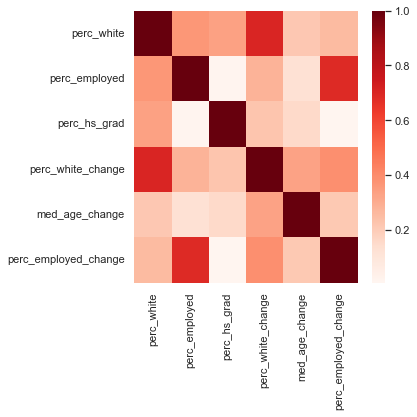

In [113]:
# Correlation matrix
cor_df = features[['perc_white', 'perc_employed', 'perc_hs_grad', 'perc_white_change', 'med_age_change', 'perc_employed_change']]
corr_matrix = cor_df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=False, cmap=plt.cm.Reds)
plt.show()

year
2013    0.889410
2014    0.888213
2015    0.887355
2016    0.886042
2017    0.884468
2018    0.883320
2019    0.882443
Name: perc_white, dtype: float64


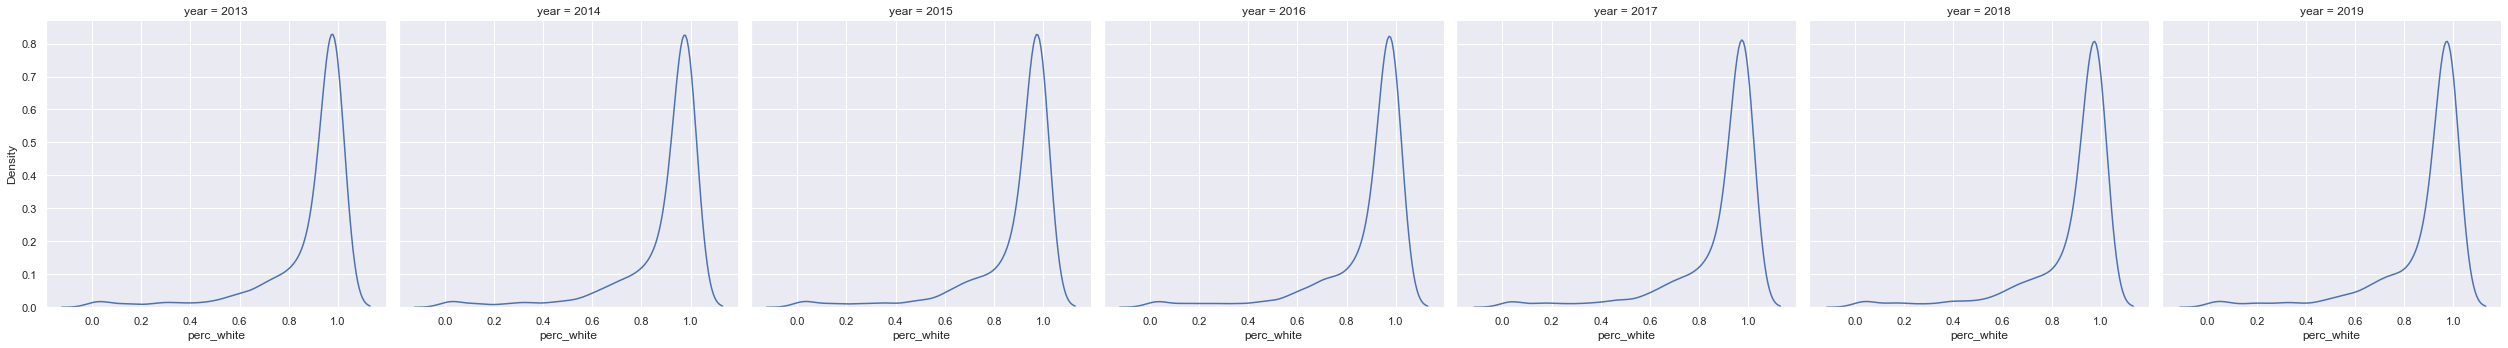

In [114]:
# Percentage of the population who is white
print(features.groupby('year').mean()['perc_white'])
sns.set_theme()
sns.displot(data=features, x="perc_white", col="year", kind="kde")

year
2013    0.309138
2014    0.308345
2015    0.307372
2016    0.304059
2017    0.303857
2018    0.299000
2019    0.297812
Name: perc_hs_grad, dtype: float64


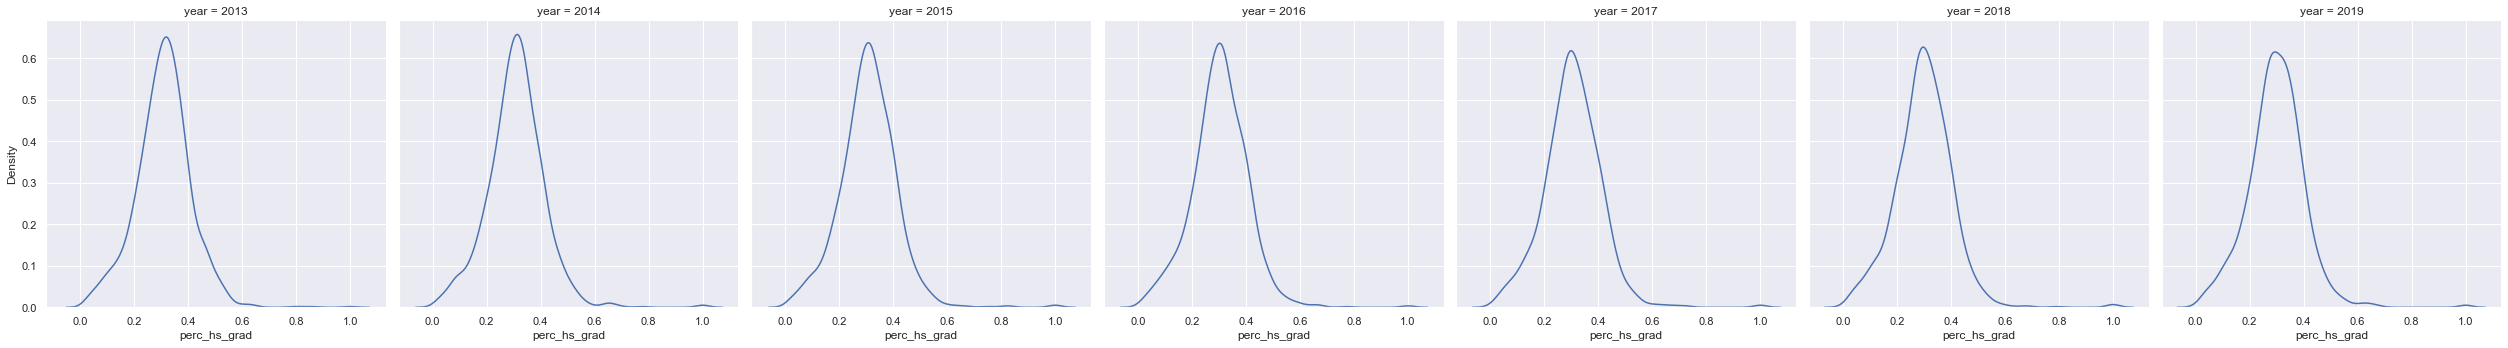

In [115]:
# Percentage of the population with high school education
print(features.groupby('year').mean()['perc_hs_grad'])
sns.set_theme()
sns.displot(data=features, x="perc_hs_grad", col="year", kind="kde")

year
2013    0.906749
2014    0.910441
2015    0.917954
2016    0.925319
2017    0.931328
2018    0.938322
2019    0.943396
Name: perc_employed, dtype: float64


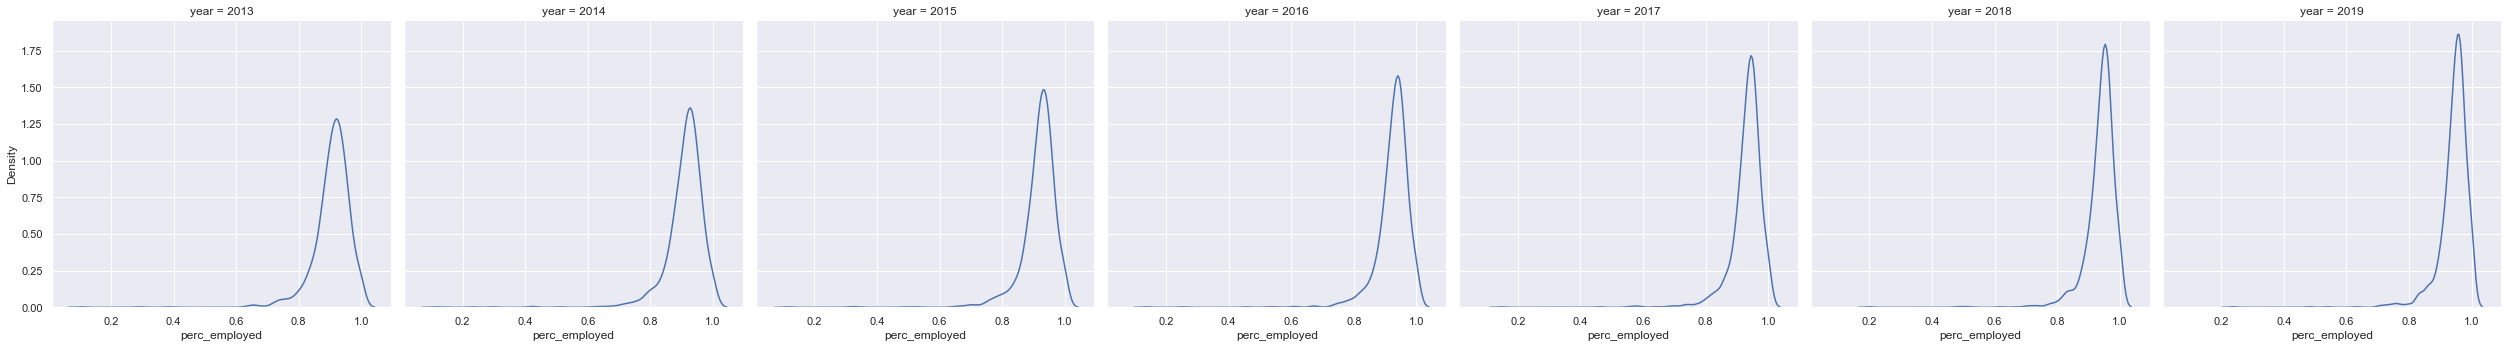

In [116]:
# Employment rate (as percentage)
print(features.groupby('year').mean()['perc_employed'])
sns.set_theme()
sns.displot(data=features, x="perc_employed", col="year", kind="kde")

### Logistic regression